###  Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Create & Load Sample Dataset

In [3]:
data = {
    "CustomerID": [1,2,3,4,5,6,7,8,9,10],
    "Gender": ["Female","Male","Female","Male","Female","Male","Female","Female","Male","Male"],
    "SeniorCitizen": [0,1,0,0,1,0,1,0,1,0],
    "Partner": ["Yes","No","Yes","No","Yes","No","Yes","No","No","Yes"],
    "Dependents": ["No","No","Yes","No","Yes","No","No","No","Yes","Yes"],
    "Tenure": [1,24,5,36,2,45,8,60,12,20],
    "PhoneService": ["Yes","Yes","No","Yes","Yes","Yes","No","Yes","Yes","No"],
    "InternetService": ["DSL","Fiber optic","DSL","Fiber optic","DSL","Fiber optic","DSL","Fiber optic","DSL","DSL"],
    "Contract": ["Month-to-month","One year","Month-to-month","Two year","Month-to-month","One year","Two year","Month-to-month","Two year","One year"],
    "MonthlyCharges": [29.85,56.95,53.85,42.30,70.70,89.10,29.75,105.50,49.90,65.00],
    "TotalCharges": [29.85,1889.5,270.65,1840.75,151.65,4000.10,199.50,6300.30,598.60,1300.50],
    "Churn": ["Yes","No","Yes","No","Yes","No","No","No","Yes","No"]
}

df = pd.DataFrame(data)
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,Yes,DSL,Month-to-month,29.85,29.85,Yes
1,2,Male,1,No,No,24,Yes,Fiber optic,One year,56.95,1889.50,No
2,3,Female,0,Yes,Yes,5,No,DSL,Month-to-month,53.85,270.65,Yes
3,4,Male,0,No,No,36,Yes,Fiber optic,Two year,42.30,1840.75,No
4,5,Female,1,Yes,Yes,2,Yes,DSL,Month-to-month,70.70,151.65,Yes
5,6,Male,0,No,No,45,Yes,Fiber optic,One year,89.10,4000.10,No
6,7,Female,1,Yes,No,8,No,DSL,Two year,29.75,199.50,No
7,8,Female,0,No,No,60,Yes,Fiber optic,Month-to-month,105.50,6300.30,No
8,9,Male,1,No,Yes,12,Yes,DSL,Two year,49.90,598.60,Yes
9,10,Male,0,Yes,Yes,20,No,DSL,One year,65.00,1300.50,No


### Handle Missing Values

In [4]:
print(df.isnull().sum())

CustomerID         0
Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64


### Convert Categorical Variables

In [5]:
le = LabelEncoder()

# Encode binary categorical columns
for col in ["Gender", "Partner", "Dependents", "PhoneService", "Churn"]:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=["InternetService", "Contract"], drop_first=True)

### Define Features and Target Variable

In [6]:
X = df.drop(columns=["CustomerID", "Churn"])
y = df["Churn"]

### Split Dataset into Train & Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Base Model (Random Forest)

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate Model with Cross-Validation

In [9]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Accuracy Scores: [1.  0.5 1.  1.  0. ]
Mean CV Accuracy: 0.7


### Hyperparameter Tuning using Grid Search

In [15]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters (Grid Search):", grid_search.best_params_)

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters (Grid Search): {'max_depth': 5, 'n_estimators': 50}


### Hyperparameter Tuning using Randomized Search

In [16]:
random_grid = {
    "n_estimators":  [50, 100, 200],
    "max_depth": [5, 10, 15]
}

random_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters (Randomized Search):", random_search.best_params_)

c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters (Randomized Search): {'n_estimators': 50, 'max_depth': 5}


### Analyze Feature Importance

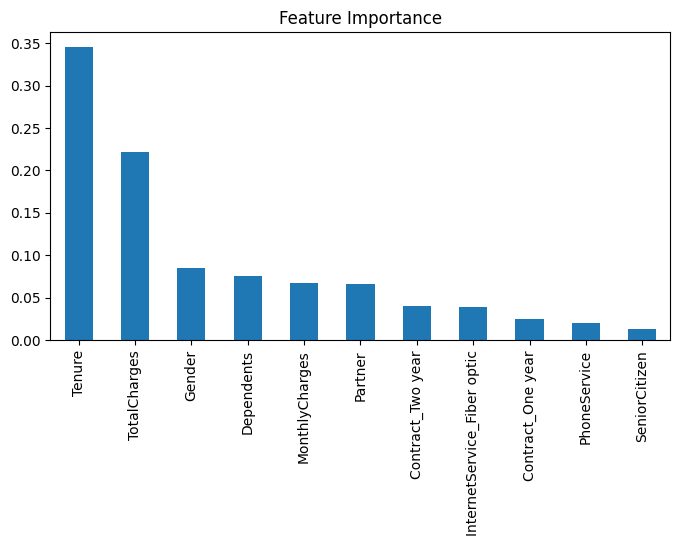

In [12]:
best_model = random_search.best_estimator_
importances = best_model.feature_importances_

feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(8,4), title="Feature Importance")
plt.show()

### Reduce Overfitting using Regularization

In [13]:
ridge = LogisticRegression(penalty='l2', solver='liblinear')
ridge.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### Evaluate the Final Optimized Model

In [14]:
y_pred = best_model.predict(X_test)

print("Final Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Final Model Performance:
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
